In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.svm import SVC

In [33]:
raw_data = pd.read_excel('ALF_Data.xlsx')
raw_data.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0


In [34]:
raw_data.columns

Index(['Age', 'Gender', 'Region', 'Weight', 'Height', 'Body Mass Index',
       'Obesity', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol',
       'Dyslipidemia', 'PVD', 'Physical Activity', 'Education', 'Unmarried',
       'Income', 'Source of Care', 'PoorVision', 'Alcohol Consumption',
       'HyperTension', 'Family  HyperTension', 'Diabetes', 'Family Diabetes',
       'Hepatitis', 'Family Hepatitis', 'Chronic Fatigue', 'ALF'],
      dtype='object')

In [35]:
raw_data.shape

(8785, 30)

In [39]:
raw_data = raw_data.drop(['Physical Activity','PVD', 'Source of Care','Family  HyperTension','Family Hepatitis','Chronic Fatigue','PVD','Region'],axis=1)

In [43]:
raw_data.head()

,Age,Gender,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,...,Education,Unmarried,Income,PoorVision,Alcohol Consumption,HyperTension,Diabetes,Family Diabetes,Hepatitis,ALF
0,65,1,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,...,0.0,0.0,1.0,0.0,1,0.0,0.0,1,1.0,0.0
1,36,1,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,...,0.0,NaN,1.0,0.0,0,0.0,0.0,0,0.0,0.0
2,66,1,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,...,0.0,1.0,0.0,0.0,1,0.0,1.0,0,0.0,0.0
3,54,1,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,...,1.0,0.0,0.0,0.0,1,0.0,0.0,0,0.0,0.0
4,63,1,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,...,0.0,0.0,NaN,0.0,0,1.0,0.0,0,0.0,0.0


In [42]:
raw_data['Gender'] = raw_data['Gender'].map({'F': 0, 'M': 1})

In [45]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(raw_data, 10))

Top Absolute Correlations
Bad Cholesterol         Total Cholesterol         0.932217
Weight                  Waist                     0.872568
Body Mass Index         Waist                     0.872456
Weight                  Body Mass Index           0.862399
Body Mass Index         Obesity                   0.780516
Obesity                 Waist                     0.681579
Gender                  Height                    0.666301
Weight                  Obesity                   0.662575
Maximum Blood Pressure  HyperTension              0.625082
Age                     Maximum Blood Pressure    0.553844
dtype: float64


In [63]:
raw_data.isnull().sum()

Age                          0
Gender                       0
Height                     191
Body Mass Index            290
Maximum Blood Pressure     304
Minimum Blood Pressure     376
Good Cholesterol            17
Total Cholesterol           16
Dyslipidemia                 0
Education                   20
Unmarried                  452
Income                    1161
PoorVision                 563
Alcohol Consumption          0
HyperTension                80
Diabetes                     2
Family Diabetes              0
Hepatitis                   22
ALF                       2785
dtype: int64

In [47]:
raw_data = raw_data.drop(['Weight','Obesity', 'Waist','Bad Cholesterol'],axis=1)

In [61]:
raw_data.dtypes

Age                         int64
Gender                      int64
Height                    float64
Body Mass Index           float64
Maximum Blood Pressure    float64
Minimum Blood Pressure    float64
Good Cholesterol          float64
Total Cholesterol         float64
Dyslipidemia                int64
Education                 float64
Unmarried                 float64
Income                    float64
PoorVision                float64
Alcohol Consumption         int64
HyperTension              float64
Diabetes                  float64
Family Diabetes             int64
Hepatitis                 float64
ALF                       float64
dtype: object

In [62]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(raw_data, 10))

Top Absolute Correlations
Gender                  Height                    0.666301
Maximum Blood Pressure  HyperTension              0.625082
Age                     Maximum Blood Pressure    0.553844
                        HyperTension              0.491531
                        ALF                       0.367639
Maximum Blood Pressure  Minimum Blood Pressure    0.342408
Gender                  Good Cholesterol          0.323312
Education               Income                    0.317448
Age                     Hepatitis                 0.266345
Total Cholesterol       Dyslipidemia              0.249612
dtype: float64


In [66]:
raw_data.isnull().sum()

Age                          0
Gender                       0
Height                     191
Body Mass Index            290
Maximum Blood Pressure     304
Minimum Blood Pressure     376
Good Cholesterol            17
Total Cholesterol           16
Dyslipidemia                 0
Education                   20
Unmarried                  452
Income                    1161
PoorVision                 563
Alcohol Consumption          0
HyperTension                80
Diabetes                     2
Family Diabetes              0
Hepatitis                   22
ALF                       2785
dtype: int64

In [67]:
cols_mode = ['Hepatitis', 'Diabetes', 'HyperTension', 'Education', 'Unmarried','PoorVision','Income']
for column in cols_mode:
    raw_data[column].fillna(raw_data[column].mode()[0], inplace=True)

In [70]:
cols_mode = ['Height', 'Body Mass Index', 'Maximum Blood Pressure', 'Minimum Blood Pressure', 'Good Cholesterol','Total Cholesterol','Income']
for column in cols_mode:
    raw_data[column].fillna(raw_data[column].mean(), inplace=True)

In [71]:
raw_data.isnull().sum()

Age                          0
Gender                       0
Height                       0
Body Mass Index              0
Maximum Blood Pressure       0
Minimum Blood Pressure       0
Good Cholesterol             0
Total Cholesterol            0
Dyslipidemia                 0
Education                    0
Unmarried                    0
Income                       0
PoorVision                   0
Alcohol Consumption          0
HyperTension                 0
Diabetes                     0
Family Diabetes              0
Hepatitis                    0
ALF                       2785
dtype: int64

In [50]:
raw_data.dtypes

Age                         int64
Gender                      int64
Height                    float64
Body Mass Index           float64
Maximum Blood Pressure    float64
Minimum Blood Pressure    float64
Good Cholesterol          float64
Total Cholesterol         float64
Dyslipidemia                int64
Education                 float64
Unmarried                 float64
Income                    float64
PoorVision                float64
Alcohol Consumption         int64
HyperTension              float64
Diabetes                  float64
Family Diabetes             int64
Hepatitis                 float64
ALF                       float64
dtype: object

In [86]:
y = raw_data['ALF']
raw_data.drop(columns=['ALF'],inplace=True)

In [91]:
X = raw_data

In [92]:
y = y[:6000]

In [93]:
y.shape

(6000,)

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [98]:
X = pd.DataFrame(scaler.transform(X),columns=X.columns)

In [99]:
X.head()

,Age,Gender,Height,Body Mass Index,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Total Cholesterol,Dyslipidemia,Education,Unmarried,Income,PoorVision,Alcohol Consumption,HyperTension,Diabetes,Family Diabetes,Hepatitis
0,0.692308,1.0,0.454806,0.170404,0.391304,0.500000,0.263158,0.343511,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.246154,1.0,0.456241,0.199265,0.149068,0.344262,0.151316,0.143511,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.707692,1.0,0.460545,0.362684,0.267081,0.385246,0.236842,0.279389,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.523077,1.0,0.431851,0.273897,0.236025,0.385246,0.434211,0.241221,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.661538,1.0,0.413199,0.308824,0.372671,0.516393,0.388158,0.227481,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [100]:
X_pred = X[:6000]

In [101]:
X = X[:6000]

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,shuffle=True ,test_size=0.2)

In [103]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=10)

In [104]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [110]:
y_pred = xgb.predict(X_test)

In [111]:
xgb.score(X_test,y_test)

0.9216666666666666

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1107
         1.0       0.48      0.13      0.20        93

    accuracy                           0.92      1200
   macro avg       0.71      0.56      0.58      1200
weighted avg       0.90      0.92      0.90      1200



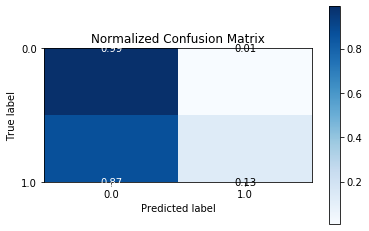

In [117]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [118]:
confusion_matrix(y_test,y_pred)

array([[1094,   13],
       [  81,   12]], dtype=int64)

In [119]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.9283333333333333

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,15)
scores = {}
scores_list = []
for k in k_range:
    knn =  KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_predict)
    scores_list.append(metrics.accuracy_score(y_test, y_predict))
knn.score(X_test, y_test)

0.9233333333333333

Text(0, 0.5, 'Testing Accuracy')

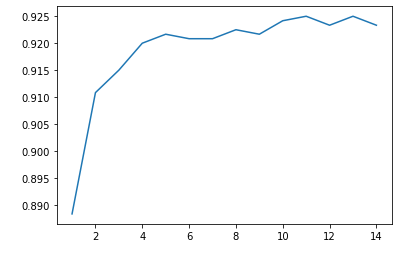

In [121]:

%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(k_range, scores_list)
plt.xlabel("Values of K for KNN",color = "white")
plt.ylabel("Testing Accuracy",color = "white")

In [127]:

knn =  KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9216666666666666

In [128]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [129]:
clf.score(X_test,y_test)

0.8808333333333334

In [142]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10,max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [143]:
clf.score(X_test,y_test)

0.9225

In [144]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9141666666666667

In [149]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0,base_estimator=LogisticRegression())
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.925

In [151]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0,base_estimator=XGBClassifier(random_state=10))
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9225

In [152]:

from sklearn.svm import SVC
svmg = SVC(gamma= 0.0000001, C=0.2,max_iter=100,probability=True)
svmg.fit(X_train, y_train)

svmg.score(X_test, y_test)

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.77

In [154]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0,base_estimator=SVC(),algorithm='SAMME')
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9225

In [156]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier().fit(X_train, y_train)
clf.score(X_train, y_train)

0.99625

In [157]:
clf.score(X_test,y_test)

0.9158333333333334

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
              ('svr', make_pipeline(LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train).score(X_test, y_test)


0.9266666666666666

In [163]:
from sklearn.neural_network  import MLPClassifier
clf = MLPClassifier(activation='tanh',solver='sgd',learning_rate='adaptive')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9225

In [168]:
from sklearn.neural_network  import MLPClassifier
clf = MLPClassifier(activation='logistic',solver='sgd',learning_rate='adaptive')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9225

In [173]:
X_train.shape

(4800, 18)

In [183]:
#input and output layer is of 20 and 4 dimensions respectively.
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=18, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [184]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [198]:
model.fit(X_train, y_train, epochs=100, batch_size=5)

Epoch 1/100
4800/4800 [==============================] - 6s 1ms/step - loss: 0.1105 - acc: 0.9563
Epoch 2/100
4800/4800 [==============================] - 3s 670us/step - loss: 0.1099 - acc: 0.9563
Epoch 3/100
4800/4800 [==============================] - 2s 496us/step - loss: 0.1104 - acc: 0.9546
Epoch 4/100
4800/4800 [==============================] - 3s 612us/step - loss: 0.1097 - acc: 0.9565
Epoch 5/100
4800/4800 [==============================] - 3s 528us/step - loss: 0.1115 - acc: 0.9542
Epoch 6/100
4800/4800 [==============================] - 3s 629us/step - loss: 0.1096 - acc: 0.9556
Epoch 7/100
4800/4800 [==============================] - 2s 503us/step - loss: 0.1078 - acc: 0.9556
Epoch 8/100
4800/4800 [==============================] - 3s 602us/step - loss: 0.1112 - acc: 0.9558
Epoch 9/100
4800/4800 [==============================] - 3s 529us/step - loss: 0.1085 - acc: 0.9567
Epoch 10/100
4800/4800 [==============================] - 2s 504us/step - loss: 0.1099 - acc: 0.9544
E

4800/4800 [==============================] - 4s 839us/step - loss: 0.1072 - acc: 0.9581
Epoch 82/100
4800/4800 [==============================] - 3s 637us/step - loss: 0.1083 - acc: 0.9556
Epoch 83/100
4800/4800 [==============================] - 4s 757us/step - loss: 0.1066 - acc: 0.9569
Epoch 84/100
4800/4800 [==============================] - 3s 596us/step - loss: 0.1060 - acc: 0.9588
Epoch 85/100
4800/4800 [==============================] - 4s 748us/step - loss: 0.1074 - acc: 0.9575
Epoch 86/100
4800/4800 [==============================] - 3s 603us/step - loss: 0.1075 - acc: 0.9569
Epoch 87/100
4800/4800 [==============================] - 4s 734us/step - loss: 0.1058 - acc: 0.9583
Epoch 88/100
4800/4800 [==============================] - 3s 579us/step - loss: 0.1080 - acc: 0.9548
Epoch 89/100
4800/4800 [==============================] - 4s 784us/step - loss: 0.1056 - acc: 0.9571
Epoch 90/100
4800/4800 [==============================] - 3s 574us/step - loss: 0.1071 - acc: 0.9569
Epo

In [199]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

4800/4800 [==============================] - 1s 105us/step
Accuracy: 95.81


In [200]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1200/1200 [==============================] - 0s 189us/step
Accuracy: 90.33


In [201]:
model.save("model_ann.h5")

In [202]:
from keras.models import load_model

In [203]:
# load model
model = load_model('model_ann.h5')
# summarize model.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                304       
_________________________________________________________________
dense_11 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 13        
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________
